In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("data/height-weight.csv")
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


Text(0, 0.5, 'Height')

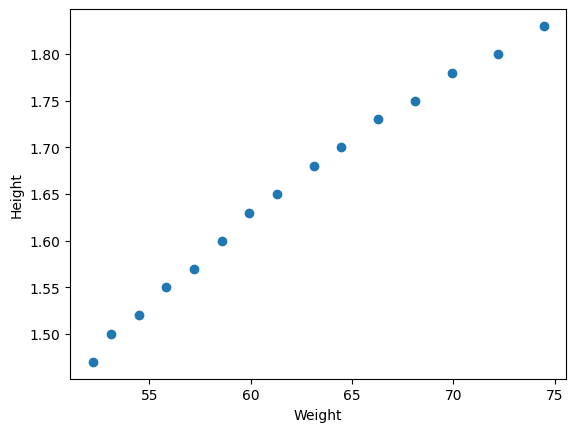

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


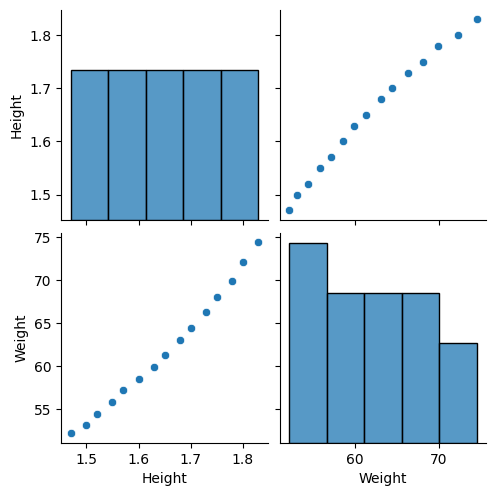

In [5]:
import seaborn as sns
sns.pairplot(df)

In [6]:
X = df[['Weight']]
y = df['Height']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25,random_state=42)


In [8]:
X_train.shape

(11, 1)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(X_train)

[[-4.27817678e-01]
 [ 2.86021775e-01]
 [-1.07090212e+00]
 [-1.28473949e+00]
 [ 2.07062041e+00]
 [-6.43227381e-01]
 [-1.42939418e-04]
 [ 7.84451526e-01]
 [ 1.35678096e+00]
 [-8.57064750e-01]
 [-2.13980309e-01]]


In [11]:
X_test = scaler.transform(X_test)
print(X_test)

[[ 0.49985914]
 [ 1.07061624]
 [-1.42782185]
 [ 1.71370068]]


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regression = LinearRegression(n_jobs=-1)

In [14]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [15]:
print(regression)

LinearRegression(n_jobs=-1)


In [16]:
regression.coef_

array([0.10138121])

In [17]:
regression.intercept_

np.float64(1.6399999999999997)

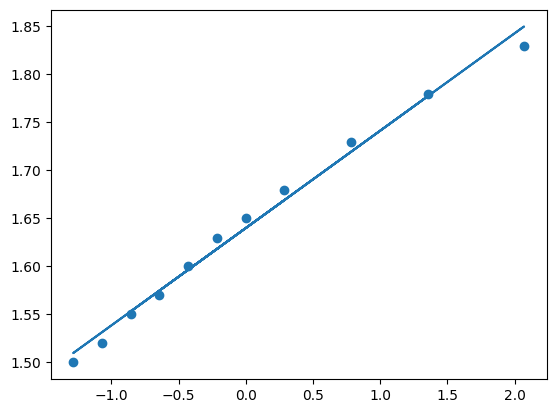

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [ ]:
### prediction of test data


In [19]:
y_pred = regression.predict(X_test)

In [22]:
## Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [21]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.00022877823247597986
0.012441511361401869
0.015125416770323384


In [23]:
score = r2_score(y_test,y_pred)

In [24]:
print(score)

0.9856565371488414


In [26]:
## OLS Linear Regression
import statsmodels.api as sm

In [27]:
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[ 0.05067633  0.10854037 -0.14475431  0.17373705]


In [29]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.096
Method:                 Least Squares   F-statistic:                            0.03821
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                       0.849
Time:                        10:10:54   Log-Likelihood:                         -21.050
No. Observations:                  11   AIC:                                      44.10
Df Residuals:                      10   BIC:                                      44.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Rohit\DataScience\MLImplementation\linvenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [31]:
regression.predict(scaler.transform([[72]]))

c:\Rohit\DataScience\MLImplementation\linvenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.81070835])